In [1]:
!pip install opencv-python

In [2]:
import os
from os import listdir
import PIL.Image as pilimg
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy

## - Load data
- Dataset: http://sintel.is.tue.mpg.de/downloads

In [3]:
folder_dir = "./MPI-Sintel-testing/test/clean/temple_1"
end = (".png", ".jpg")

In [4]:
file_name_list = os.listdir(folder_dir)

## - Sort images in time order

In [5]:
file_name_list.sort()
print(file_name_list)

['frame_0001.png', 'frame_0002.png', 'frame_0003.png', 'frame_0004.png', 'frame_0005.png', 'frame_0006.png', 'frame_0007.png', 'frame_0008.png', 'frame_0009.png', 'frame_0010.png', 'frame_0011.png', 'frame_0012.png', 'frame_0013.png', 'frame_0014.png', 'frame_0015.png', 'frame_0016.png', 'frame_0017.png', 'frame_0018.png', 'frame_0019.png', 'frame_0020.png', 'frame_0021.png', 'frame_0022.png', 'frame_0023.png', 'frame_0024.png', 'frame_0025.png', 'frame_0026.png', 'frame_0027.png', 'frame_0028.png', 'frame_0029.png', 'frame_0030.png', 'frame_0031.png', 'frame_0032.png', 'frame_0033.png', 'frame_0034.png', 'frame_0035.png', 'frame_0036.png', 'frame_0037.png', 'frame_0038.png', 'frame_0039.png', 'frame_0040.png', 'frame_0041.png', 'frame_0042.png', 'frame_0043.png', 'frame_0044.png', 'frame_0045.png', 'frame_0046.png', 'frame_0047.png', 'frame_0048.png', 'frame_0049.png', 'frame_0050.png']


## - Parameters for ShiTomasi corner detection

In [6]:
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

## - Parameters for lucas kanade optical flow

In [7]:
lk_params = dict( winSize  = (15, 15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

## - Lucas-Kanade static optical flow 

good_old[0]: [525. 181.]
good_new[0]: [524.08325 182.90555]
good_old[-1]: [102. 114.]
good_new[-1]: [ 97.7468  115.52762]


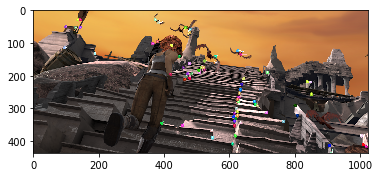

good_old[0]: [524.08325 182.90555]
good_new[0]: [523.1187  184.80894]
good_old[-1]: [ 97.7468  115.52762]
good_new[-1]: [ 93.45182  117.000404]


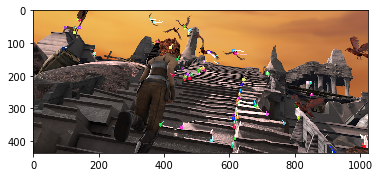

good_old[0]: [523.1187  184.80894]
good_new[0]: [522.14166 186.76892]
good_old[-1]: [ 93.45182  117.000404]
good_new[-1]: [ 89.25357 118.49436]


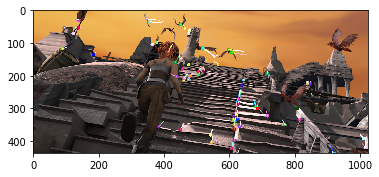

good_old[0]: [522.14166 186.76892]
good_new[0]: [521.16364 188.68481]
good_old[-1]: [ 89.25357 118.49436]
good_new[-1]: [ 84.7707   119.870926]


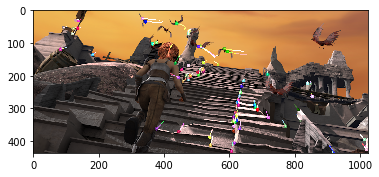

good_old[0]: [521.16364 188.68481]
good_new[0]: [520.1806  190.63779]
good_old[-1]: [ 84.7707   119.870926]
good_new[-1]: [ 80.073555 121.188255]


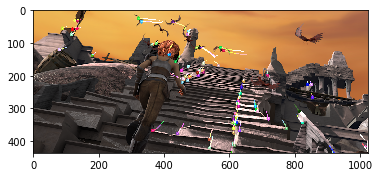

good_old[0]: [520.1806  190.63779]
good_new[0]: [519.23035 192.19669]
good_old[-1]: [ 80.073555 121.188255]
good_new[-1]: [ 75.09368  122.399086]


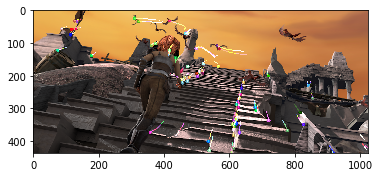

good_old[0]: [519.23035 192.19669]
good_new[0]: [518.2223  194.13783]
good_old[-1]: [ 75.09368  122.399086]
good_new[-1]: [ 70.04647 123.55617]


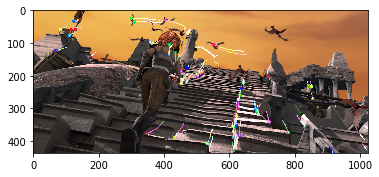

good_old[0]: [518.2223  194.13783]
good_new[0]: [517.16284 196.04752]
good_old[-1]: [ 70.04647 123.55617]
good_new[-1]: [ 64.82184  124.681915]


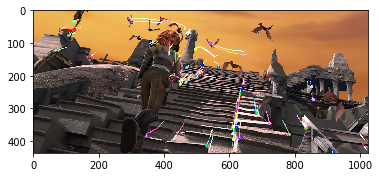

good_old[0]: [517.16284 196.04752]
good_new[0]: [516.1168  197.91542]
good_old[-1]: [ 64.82184  124.681915]
good_new[-1]: [ 59.45295 125.76795]


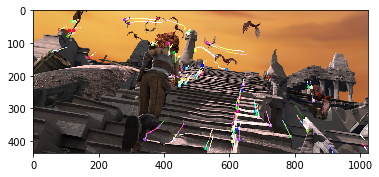

good_old[0]: [516.1168  197.91542]
good_new[0]: [515.0537  199.82062]
good_old[-1]: [ 59.45295 125.76795]
good_new[-1]: [ 54.019436 126.837845]


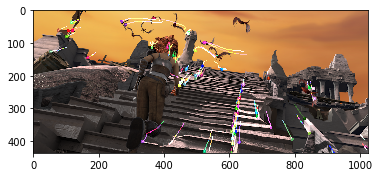

good_old[0]: [515.0537  199.82062]
good_new[0]: [513.9667  201.73367]
good_old[-1]: [ 54.019436 126.837845]
good_new[-1]: [ 48.45314 127.894  ]


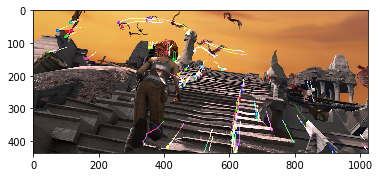

good_old[0]: [513.9667  201.73367]
good_new[0]: [512.9025  203.67819]
good_old[-1]: [ 48.45314 127.894  ]
good_new[-1]: [ 42.741352 128.92725 ]


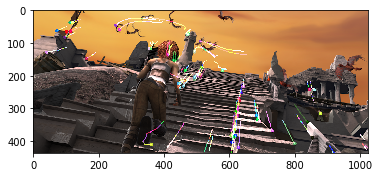

good_old[0]: [512.9025  203.67819]
good_new[0]: [511.80664 205.62221]
good_old[-1]: [ 42.741352 128.92725 ]
good_new[-1]: [ 36.950592 129.90651 ]


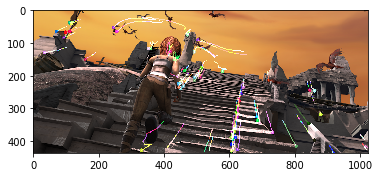

good_old[0]: [511.80664 205.62221]
good_new[0]: [510.72668 207.37535]
good_old[-1]: [ 36.950592 129.90651 ]
good_new[-1]: [ 31.12243 130.89929]


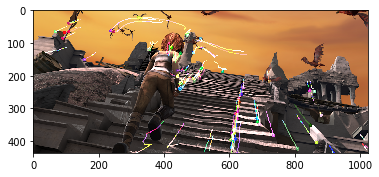

good_old[0]: [510.72668 207.37535]
good_new[0]: [509.65625 209.3319 ]
good_old[-1]: [ 31.12243 130.89929]
good_new[-1]: [ 25.136833 131.88937 ]


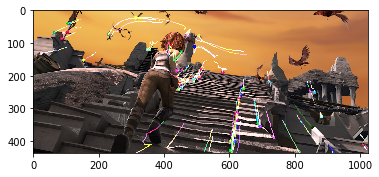

good_old[0]: [509.65625 209.3319 ]
good_new[0]: [508.53857 211.27492]
good_old[-1]: [ 25.136833 131.88937 ]
good_new[-1]: [ 18.990923 132.8211  ]


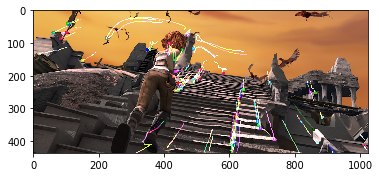

good_old[0]: [508.53857 211.27492]
good_new[0]: [507.41876 213.22018]
good_old[-1]: [ 18.990923 132.8211  ]
good_new[-1]: [ 12.778883 133.75314 ]


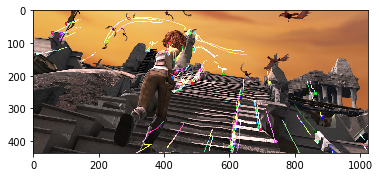

good_old[0]: [507.41876 213.22018]
good_new[0]: [506.2589 215.1657]
good_old[-1]: [ 12.778883 133.75314 ]
good_new[-1]: [ -3.2840843 134.19672  ]


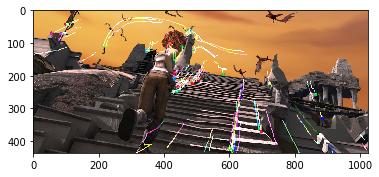

good_old[0]: [506.2589 215.1657]
good_new[0]: [505.08252 217.0911 ]
good_old[-1]: [873.47864 404.0128 ]
good_new[-1]: [881.8873  421.92712]


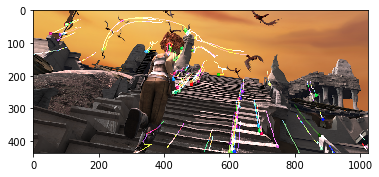

good_old[0]: [505.08252 217.0911 ]
good_new[0]: [503.85098 219.01305]
good_old[-1]: [886.6753 333.9198]
good_new[-1]: [887.9192  336.61087]


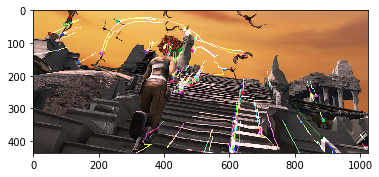

good_old[0]: [503.85098 219.01305]
good_new[0]: [502.66605 220.91971]
good_old[-1]: [887.9192  336.61087]
good_new[-1]: [889.2367 339.3588]


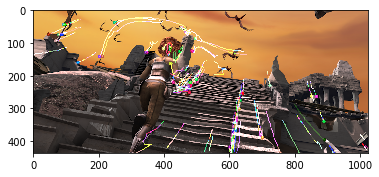

good_old[0]: [502.66605 220.91971]
good_new[0]: [501.46942 222.83224]
good_old[-1]: [889.2367 339.3588]
good_new[-1]: [890.55347 342.04477]


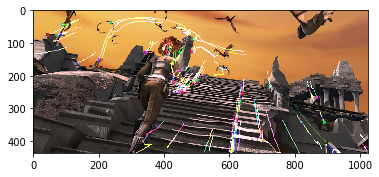

good_old[0]: [501.46942 222.83224]
good_new[0]: [500.31046 224.78096]
good_old[-1]: [890.55347 342.04477]
good_new[-1]: [891.80066 344.76074]


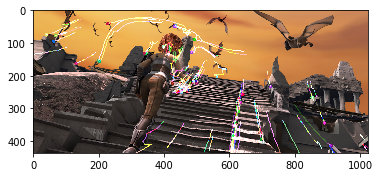

good_old[0]: [500.31046 224.78096]
good_new[0]: [499.0029 226.72  ]
good_old[-1]: [891.80066 344.76074]
good_new[-1]: [893.1632  347.51822]


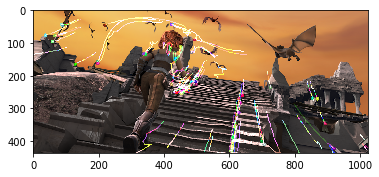

good_old[0]: [499.0029 226.72  ]
good_new[0]: [497.71863 228.65305]
good_old[-1]: [893.1632  347.51822]
good_new[-1]: [894.58514 350.2568 ]


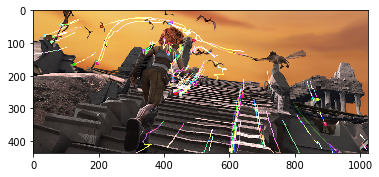

good_old[0]: [497.71863 228.65305]
good_new[0]: [496.45148 230.59886]
good_old[-1]: [894.58514 350.2568 ]
good_new[-1]: [895.88574 352.9989 ]


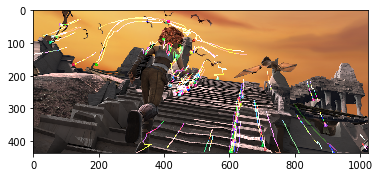

good_old[0]: [496.45148 230.59886]
good_new[0]: [495.21317 232.55457]
good_old[-1]: [895.88574 352.9989 ]
good_new[-1]: [897.35455 355.74942]


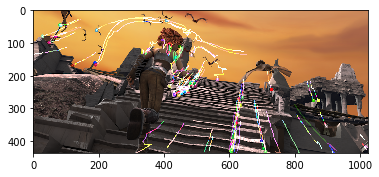

good_old[0]: [495.21317 232.55457]
good_new[0]: [493.88095 234.51184]
good_old[-1]: [897.35455 355.74942]
good_new[-1]: [898.7451 358.5604]


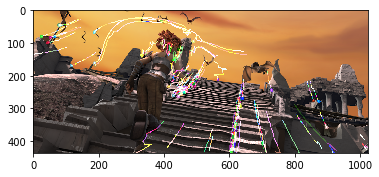

good_old[0]: [493.88095 234.51184]
good_new[0]: [492.36807 236.44485]
good_old[-1]: [898.7451 358.5604]
good_new[-1]: [900.2548  361.34335]


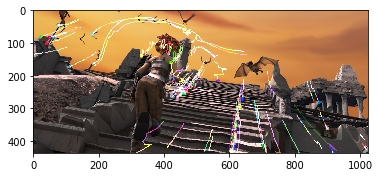

good_old[0]: [492.36807 236.44485]
good_new[0]: [491.03442 238.39682]
good_old[-1]: [900.2548  361.34335]
good_new[-1]: [901.69006 364.11145]


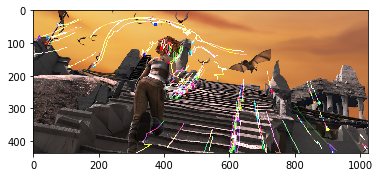

good_old[0]: [491.03442 238.39682]
good_new[0]: [489.65176 240.35684]
good_old[-1]: [901.69006 364.11145]
good_new[-1]: [903.1467  366.89874]


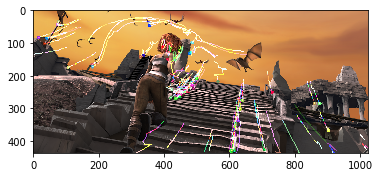

good_old[0]: [489.65176 240.35684]
good_new[0]: [488.29947 242.29756]
good_old[-1]: [903.1467  366.89874]
good_new[-1]: [904.71857 369.71463]


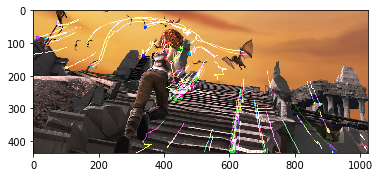

good_old[0]: [488.29947 242.29756]
good_new[0]: [486.88113 244.2423 ]
good_old[-1]: [904.71857 369.71463]
good_new[-1]: [906.29913 372.52966]


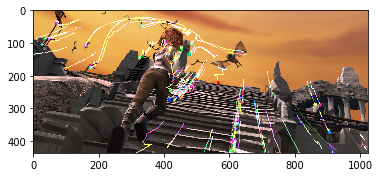

good_old[0]: [486.88113 244.2423 ]
good_new[0]: [485.4497  246.19345]
good_old[-1]: [906.29913 372.52966]
good_new[-1]: [907.8091  375.42242]


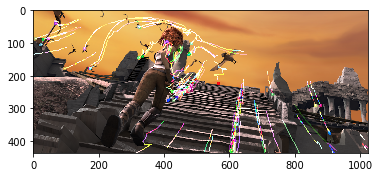

good_old[0]: [485.4497  246.19345]
good_new[0]: [484.03085 248.15964]
good_old[-1]: [907.8091  375.42242]
good_new[-1]: [909.4514 378.2501]


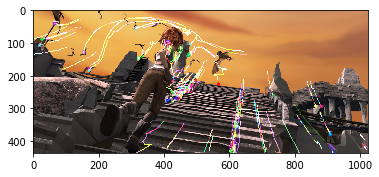

good_old[0]: [484.03085 248.15964]
good_new[0]: [482.56198 250.0925 ]
good_old[-1]: [909.4514 378.2501]
good_new[-1]: [910.9929 381.2279]


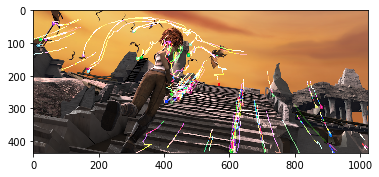

good_old[0]: [482.56198 250.0925 ]
good_new[0]: [481.0884  252.04855]
good_old[-1]: [910.9929 381.2279]
good_new[-1]: [912.65125 384.07184]


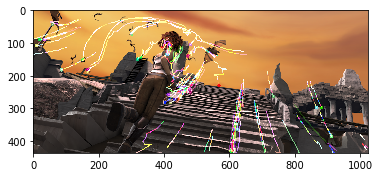

good_old[0]: [481.0884  252.04855]
good_new[0]: [479.5772  253.98271]
good_old[-1]: [912.65125 384.07184]
good_new[-1]: [914.3663 386.9558]


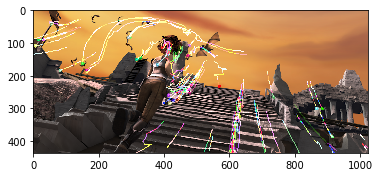

good_old[0]: [479.5772  253.98271]
good_new[0]: [477.89978 255.87685]
good_old[-1]: [914.3663 386.9558]
good_new[-1]: [916.0277  389.84814]


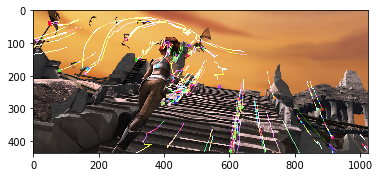

good_old[0]: [477.89978 255.87685]
good_new[0]: [476.44974 257.79233]
good_old[-1]: [916.0277  389.84814]
good_new[-1]: [917.7398  392.83038]


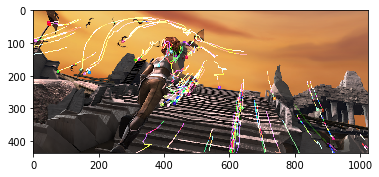

good_old[0]: [476.44974 257.79233]
good_new[0]: [474.82895 259.74146]
good_old[-1]: [917.7398  392.83038]
good_new[-1]: [919.49646 395.74475]


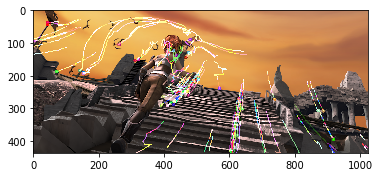

good_old[0]: [474.82895 259.74146]
good_new[0]: [473.31558 261.73114]
good_old[-1]: [919.49646 395.74475]
good_new[-1]: [921.2971  398.67883]


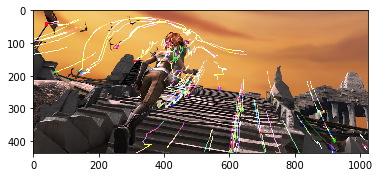

good_old[0]: [473.31558 261.73114]
good_new[0]: [471.64377 263.70062]
good_old[-1]: [921.2971  398.67883]
good_new[-1]: [923.11285 401.67554]


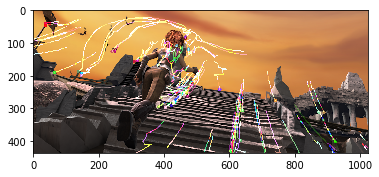

good_old[0]: [471.64377 263.70062]
good_new[0]: [470.0079  265.66788]
good_old[-1]: [923.11285 401.67554]
good_new[-1]: [924.8884  404.78116]


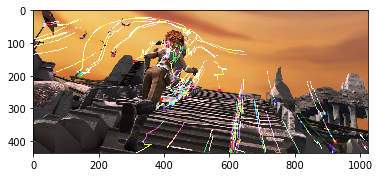

good_old[0]: [470.0079  265.66788]
good_new[0]: [468.37985 267.6493 ]
good_old[-1]: [924.8884  404.78116]
good_new[-1]: [926.7628  407.72244]


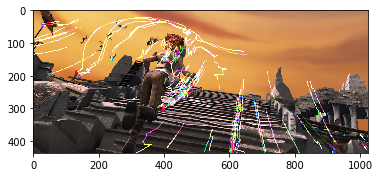

good_old[0]: [468.37985 267.6493 ]
good_new[0]: [466.60016 269.61612]
good_old[-1]: [926.7628  407.72244]
good_new[-1]: [928.6891 410.7055]


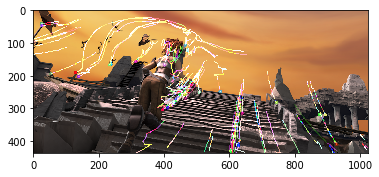

good_old[0]: [466.60016 269.61612]
good_new[0]: [464.88245 271.6203 ]
good_old[-1]: [928.6891 410.7055]
good_new[-1]: [930.6068  413.82208]


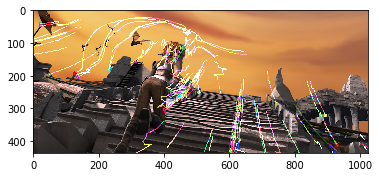

good_old[0]: [464.88245 271.6203 ]
good_new[0]: [463.15573 273.5962 ]
good_old[-1]: [930.6068  413.82208]
good_new[-1]: [932.5657 416.849 ]


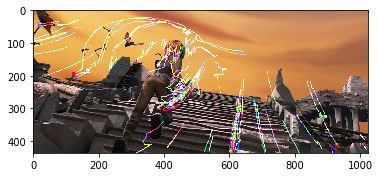

good_old[0]: [463.15573 273.5962 ]
good_new[0]: [461.34442 275.5693 ]
good_old[-1]: [932.5657 416.849 ]
good_new[-1]: [934.4963 420.0354]


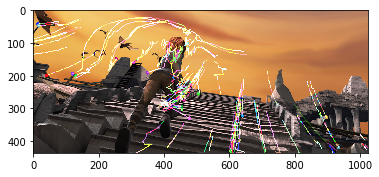

In [8]:
for i, file_name in enumerate(file_name_list):
 
    if (file_name.endswith(end)):
        img_path = os.path.join(folder_dir, file_name)
        
        # Read image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Gray scale
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        
        # Show raw image
        #plt.imshow(img, interpolation='nearest')
        #plt.show()
        
        if i == 0:
           
            # Take first frame and find corners in it 
            # (points, 1, 2)
            p0 = cv2.goodFeaturesToTrack(img_gray, mask = None, **feature_params)
            
            # Create a mask image for drawing purposes
            mask = np.zeros_like(img)
            
            # Create some random colors
            color = np.random.randint(0, 255, (100, 3))
        
        elif i > 0:
            
            # Calculate optical flow
            p1, st, err = cv2.calcOpticalFlowPyrLK(prev_img_gray, img_gray, p0, None, **lk_params)
            
            # Select good points
            if p1 is not None:
                good_new = p1[st==1]
                good_old = p0[st==1]

            print('good_old[0]:', good_old[0])
            print('good_new[0]:', good_new[0])
            print('good_old[-1]:', good_old[-1])
            print('good_new[-1]:', good_new[-1])
            
            # Draw the tracks
            for i, (new, old) in enumerate(zip(good_new, good_old)):
                a, b = new.ravel()
                c, d = old.ravel()
                mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
                img = cv2.circle(img, (int(a), int(b)), 5, color[i].tolist(), -1)
            img = cv2.add(img, mask)

            # Show result image
            plt.imshow(img, interpolation='nearest')
            plt.show()            
            
            # Update
            p0 = good_new.reshape(-1, 1, 2)

        prev_img_gray = copy.deepcopy(img_gray)